# Data Science Assignment 1: Ritika Thakur (2022408) | Swarnima Prasad (2022525)

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Loading the data

In [33]:
df = pd.read_csv('AutoMPG.csv')

In [34]:
print(df.head())

print("\nData Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130  3504.0          12.0        70.0   
1  15.0          8         350.0        165  3693.0          11.5        70.0   
2  18.0          8         318.0        150  3436.0          11.0        70.0   
3  16.0          8         304.0        150  3433.0          12.0        70.0   
4  17.0          8         302.0        140  3449.0          10.5        70.0   

   origin  
0     1.0  
1     1.0  
2     1.0  
3     1.0  
4     1.0  

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     399 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration

Dropping the redundant last row

In [35]:
# Drop the last row using the index of the last row
df.drop(df.index[-1], inplace=True)

#### Handling Missing Values 

In [36]:
# Replace '?' with NaN
df['horsepower'].replace('?', pd.NA, inplace=True)

# Drop rows where 'horsepower' is missing
df.dropna(subset=['horsepower'], inplace=True)

# Convert 'horsepower' to numeric after dropping rows
df['horsepower'] = pd.to_numeric(df['horsepower'])

# Verify the changes
print(df['horsepower'].head())

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: int64


C:\Users\Ritika\AppData\Local\Temp\ipykernel_52084\2527508700.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace('?', pd.NA, inplace=True)


In [37]:
# Verify the changes
print(df.tail()) 
print("\nMissing Values:")
print(df.isnull().sum())

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
393  27.0          4         140.0          86  2790.0          15.6   
394  44.0          4          97.0          52  2130.0          24.6   
395  32.0          4         135.0          84  2295.0          11.6   
396  28.0          4         120.0          79  2625.0          18.6   
397  31.0          4         119.0          82  2720.0          19.4   

     model year  origin  
393        82.0     1.0  
394        82.0     2.0  
395        82.0     1.0  
396        82.0     1.0  
397        82.0     1.0  

Missing Values:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    float64
 7   origin        392 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 27.6 KB
None


In [39]:
# Total number of rows before handling '?'
initial_row_count = pd.read_csv('AutoMPG.csv').shape[0]

# Total number of rows after handling '?'
final_row_count = df.shape[0]

print(f"Initial number of rows: {initial_row_count}")
print(f"Final number of rows: {final_row_count}")

Initial number of rows: 399
Final number of rows: 392


### Trying outlier detection Techniques

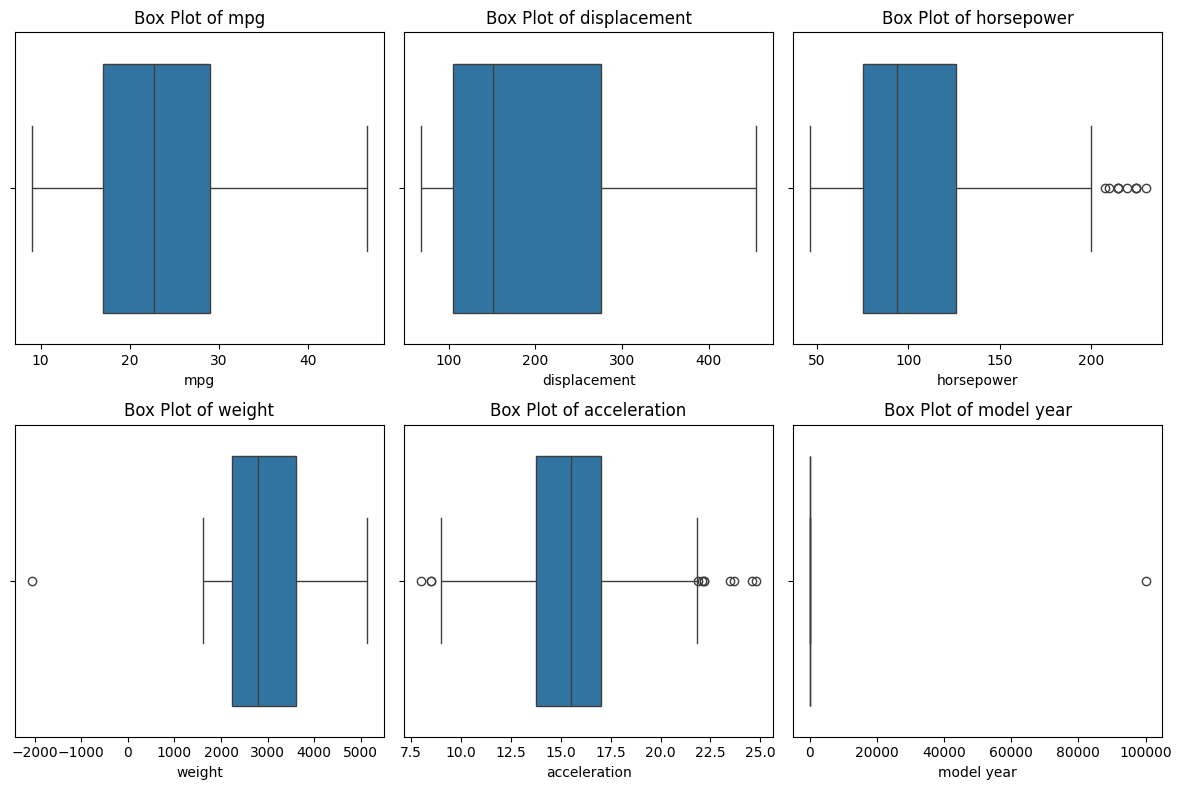

In [40]:
numerical_columns = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

Horsepower and acceleration are the two features with most outliers.

<Figure size 1200x800 with 0 Axes>

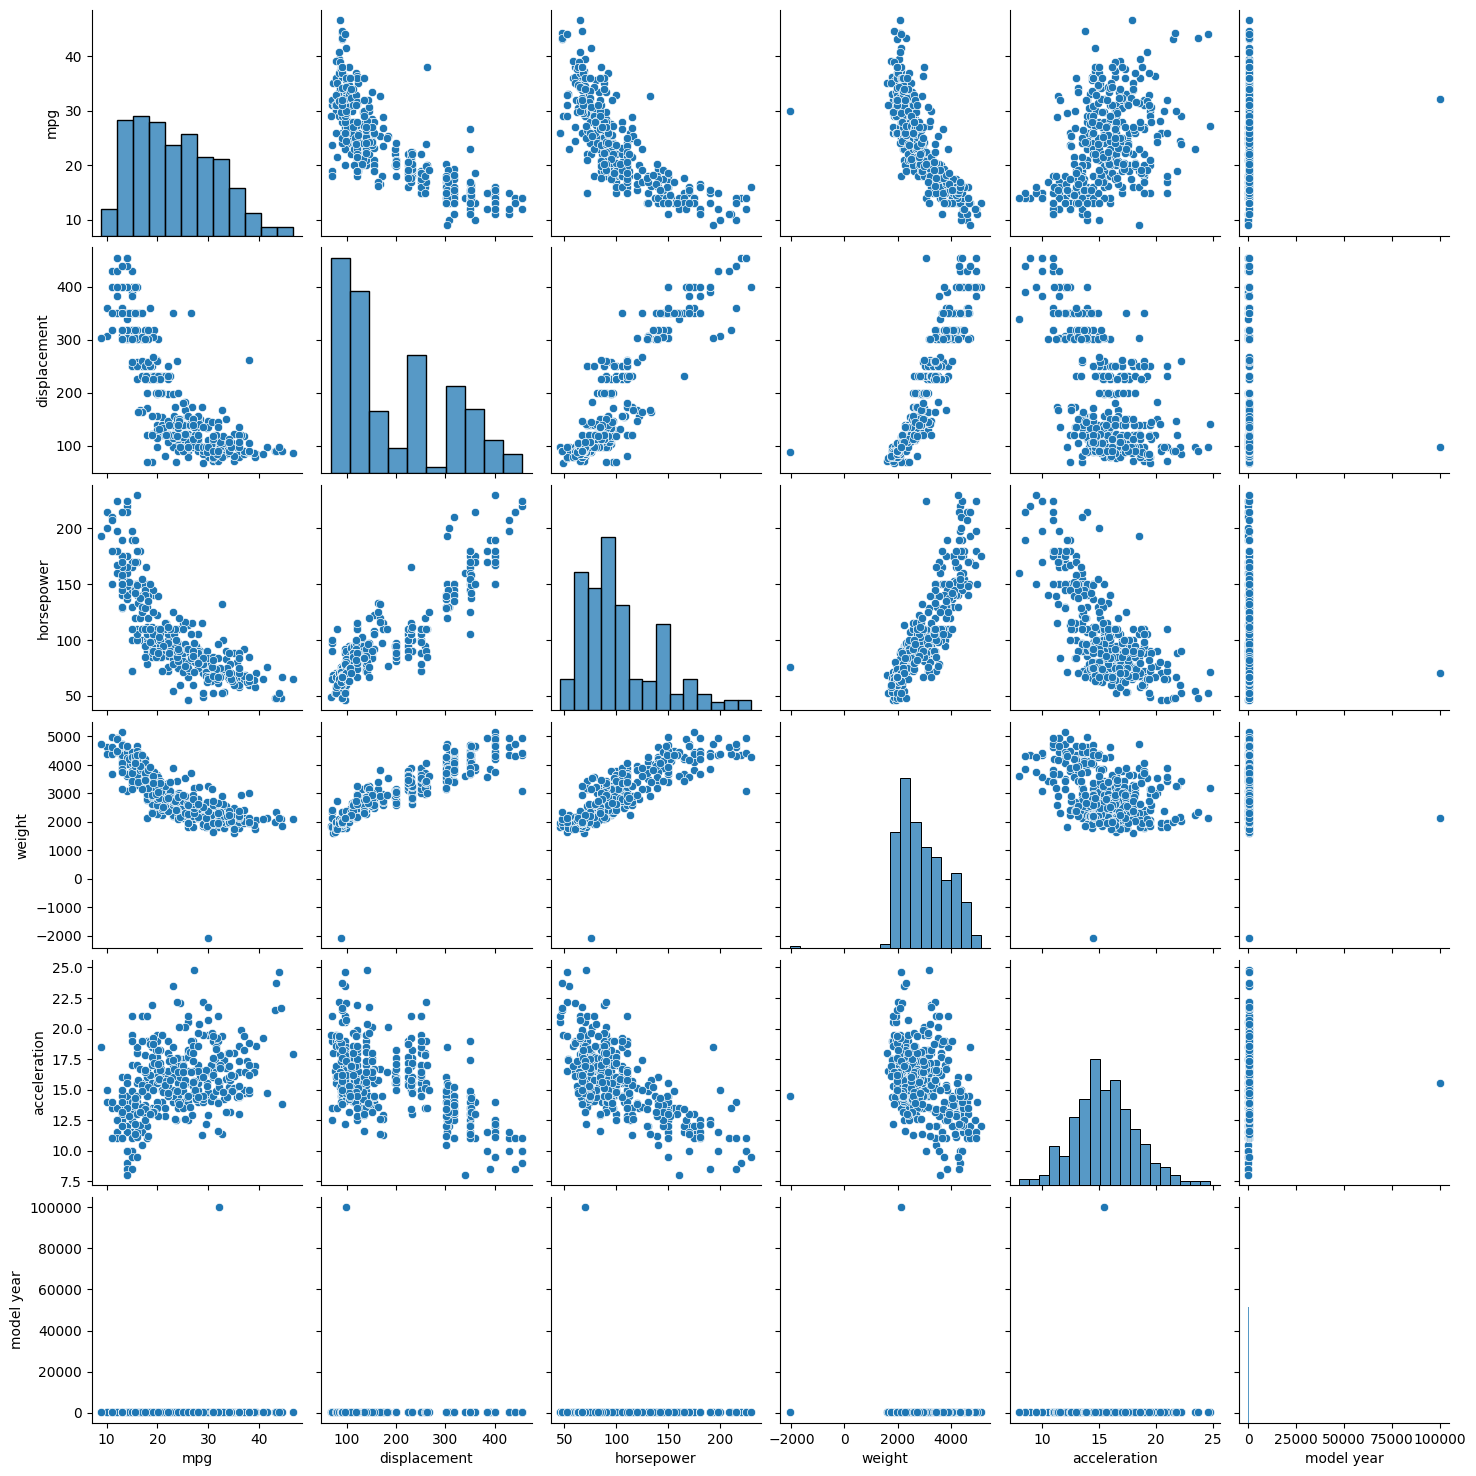

In [41]:
# Scatter plots to check relationships and outliers
plt.figure(figsize=(12, 8))
sns.pairplot(df[numerical_columns])
plt.show()

In [42]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = df[numerical_columns].apply(zscore)

outliers = (z_scores.abs() > 3).sum()
print("Number of outliers in each column based on Z-score:")
print(outliers)

Number of outliers in each column based on Z-score:
mpg             0
displacement    0
horsepower      5
weight          1
acceleration    2
model year      1
dtype: int64


Outliers with Z-score > 3 or < -3

In [43]:
# Function to identify outliers using IQR
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

# Check outliers for each numerical column
for col in numerical_columns:
    outliers_iqr = detect_outliers_iqr(df, col)
    print(f'Number of outliers in {col} based on IQR: {len(outliers_iqr)}')

Number of outliers in mpg based on IQR: 0
Number of outliers in displacement based on IQR: 0
Number of outliers in horsepower based on IQR: 10
Number of outliers in weight based on IQR: 1
Number of outliers in acceleration based on IQR: 11
Number of outliers in model year based on IQR: 1


### Removing Outliers

In [44]:
# Function to calculate outlier bounds
def calculate_outlier_bounds(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Calculate outlier bounds for each numerical column
initial_shape = df.shape
outlier_bounds = {col: calculate_outlier_bounds(col) for col in numerical_columns}
print(outlier_bounds)


{'mpg': (np.float64(-1.0), np.float64(47.0)), 'displacement': (np.float64(-151.125), np.float64(531.875)), 'horsepower': (np.float64(-1.5), np.float64(202.5)), 'weight': (np.float64(141.0), np.float64(5699.0)), 'acceleration': (np.float64(8.900000000000002), np.float64(21.899999999999995)), 'model year': (np.float64(64.0), np.float64(88.0))}


In [45]:
# Function to remove outliers based on bounds
def remove_outliers(df, column, lower_bound, upper_bound):
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal for each numerical column
for col in numerical_columns:
    lower_bound, upper_bound = outlier_bounds[col]
    df = remove_outliers(df, col, lower_bound, upper_bound)

In [46]:
print(f"Shape before removing outliers: {initial_shape}")
print(f"Shape after removing outliers: {df.shape}")

Shape before removing outliers: (392, 8)
Shape after removing outliers: (370, 8)


In [47]:
# Save DataFrame to a CSV file
df.to_csv('Cleaned_AutoMPG.csv', index=False)

In [48]:
df = pd.read_csv('Cleaned_AutoMPG.csv')

In [49]:
print("\nCleaned Data Summary:")
print(df.describe())


Cleaned Data Summary:
              mpg   cylinders  displacement  horsepower       weight  \
count  370.000000  370.000000    370.000000  370.000000   370.000000   
mean    23.612703    5.418919    189.458108  102.035135  2948.648649   
std      7.633255    1.674022     98.730198   33.684675   829.145929   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.600000    4.000000    105.000000   76.000000  2223.750000   
50%     23.000000    4.000000    146.000000   92.500000  2781.500000   
75%     29.000000    6.000000    258.000000  120.000000  3556.000000   
max     46.600000    8.000000    429.000000  200.000000  5140.000000   

       acceleration  model year      origin  
count    370.000000  370.000000  370.000000  
mean      15.549189   76.113514    1.594595  
std        2.408187    3.622884    0.818468  
min        9.500000   70.000000    1.000000  
25%       14.000000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%   

#### Plotting histograms to assess the distribution of the data

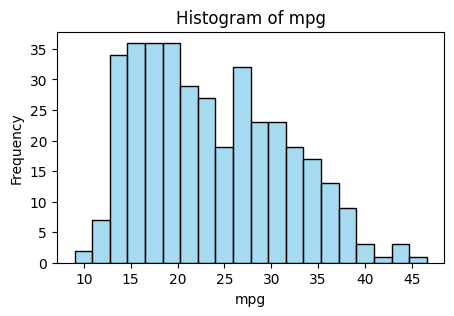

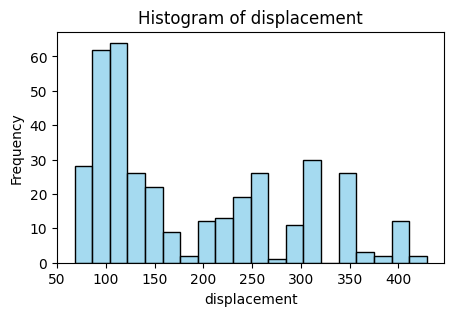

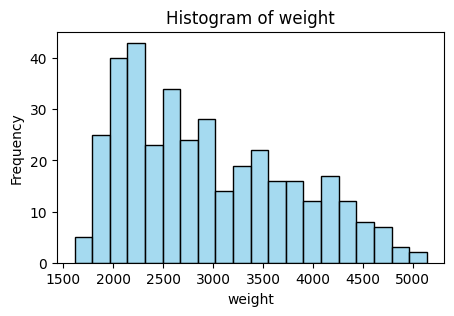

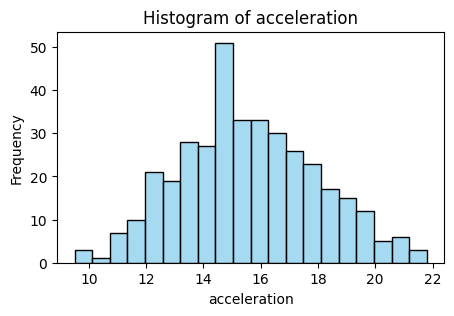

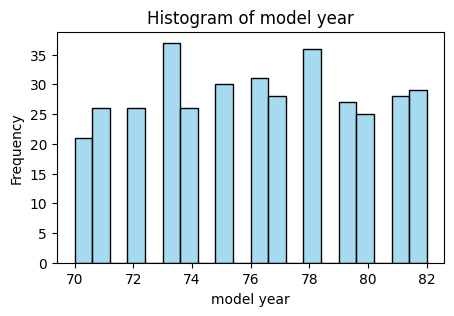

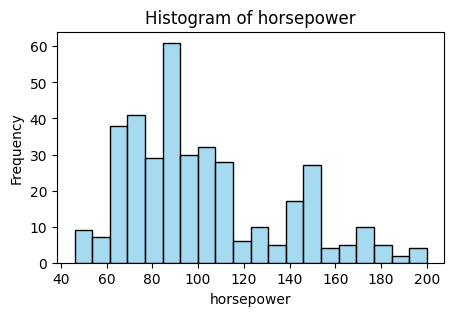

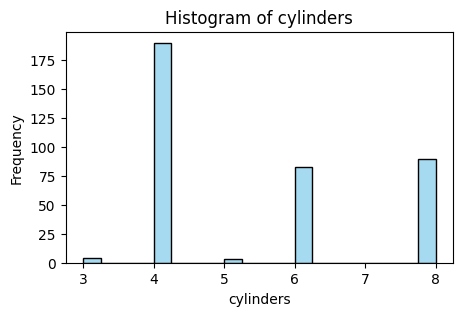

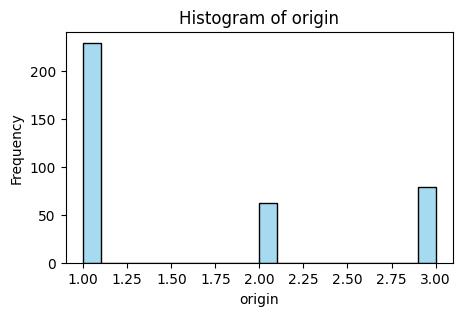

In [50]:
def plot_histogram(attribute):
    if attribute in df.columns:
        plt.figure(figsize=(5, 3))
        sns.histplot(df[attribute], kde=False, bins=20, color="skyblue")
        plt.title(f'Histogram of {attribute}')
        plt.xlabel(attribute)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"{attribute} not found in dataset.")

# Plot histograms for continuous attributes
plot_histogram('mpg')
plot_histogram('displacement')
plot_histogram('weight')
plot_histogram('acceleration')
plot_histogram('model year')
plot_histogram('horsepower')
plot_histogram('cylinders')
plot_histogram('origin')

In [51]:
features = df.select_dtypes(include=[np.number])
print(features)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0         130  3504.0          12.0   
1    15.0          8         350.0         165  3693.0          11.5   
2    18.0          8         318.0         150  3436.0          11.0   
3    16.0          8         304.0         150  3433.0          12.0   
4    17.0          8         302.0         140  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
365  27.0          4         151.0          90  2950.0          17.3   
366  27.0          4         140.0          86  2790.0          15.6   
367  32.0          4         135.0          84  2295.0          11.6   
368  28.0          4         120.0          79  2625.0          18.6   
369  31.0          4         119.0          82  2720.0          19.4   

     model year  origin  
0          70.0     1.0  
1          70.0     1.0  
2          70.0     1.0  
3          70.0     1.0  
4    

### Calculating Mean , Variance and Squared Deviation on attributes

#### Mean of each feature

$$\mu = \frac{\sum_{i=1}^{n} x_i}{n}$$

In [52]:
def calculate_mean(df):
    num_rows = len(df)
    mean_vector = df.sum() / num_rows
    return mean_vector

mean_vector = calculate_mean(df)
print("Mean of each feature:\n", mean_vector)

Mean of each feature:
 mpg               23.612703
cylinders          5.418919
displacement     189.458108
horsepower       102.035135
weight          2948.648649
acceleration      15.549189
model year        76.113514
origin             1.594595
dtype: float64


#### Variance of each feature

$$\sigma^2 = \frac{\sum_{i=1}^{n} (x_i - \mu)^2}{n}$$

In [53]:
def calculate_variance(df, mean_vector):
    num_rows = len(df)
    variance = ((df - mean_vector) ** 2).sum() / num_rows  # Manual calculation of variance
    return variance

variance_vector = calculate_variance(df, mean_vector)
print("Variance of each feature:\n", variance_vector)

Variance of each feature:
 mpg                 58.109109
cylinders            2.794777
displacement      9721.307029
horsepower        1131.590657
weight          685624.908985
acceleration         5.783689
model year          13.089817
origin               0.668079
dtype: float64


#### Total Variance

$$\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^T (x_i - \mu)$$

In [54]:
total_variance = 0
for i in range(len(df)):
    total_variance += np.dot((df.iloc[i] - mean_vector).T, (df.iloc[i] - mean_vector))
total_variance = total_variance / len(df)
print("\nTotal Variance  (σ²):")
print(total_variance)


Total Variance  (σ²):
696558.2521418552


### Normalizing Data

Standard deviation:

$$\sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \mu)^2}{n}}$$

Standardization:

$$x_{new} = \frac{x - \mu}{\sigma}$$

In [55]:
def standardize_data(df):
    mean_vector = df.mean()  # Compute the mean for each column
    print(mean_vector)
    std_vector =   (calculate_variance(df, mean_vector))**0.5 # Compute the standard deviation for each column
    print(std_vector)
    standardized_df = (df - mean_vector) / std_vector  # Perform standardization
    return standardized_df, mean_vector, std_vector

# Normalize the cleaned dataset
standardized_df, mean_vector, std_vector = standardize_data(df)
print("Standardized data:\n", standardized_df)

mpg               23.612703
cylinders          5.418919
displacement     189.458108
horsepower       102.035135
weight          2948.648649
acceleration      15.549189
model year        76.113514
origin             1.594595
dtype: float64
mpg               7.622933
cylinders         1.671759
displacement     98.596689
horsepower       33.639124
weight          828.024703
acceleration      2.404930
model year        3.617985
origin            0.817361
dtype: float64
Standardized data:
           mpg  cylinders  displacement  horsepower    weight  acceleration  \
0   -0.736292   1.543932      1.192148    0.831320  0.670694     -1.475797   
1   -1.129841   1.543932      1.628269    1.871775  0.898948     -1.683704   
2   -0.736292   1.543932      1.303714    1.425865  0.588571     -1.891610   
3   -0.998658   1.543932      1.161721    1.425865  0.584948     -1.475797   
4   -0.867475   1.543932      1.141437    1.128593  0.604271     -2.099516   
..        ...        ...           ...    

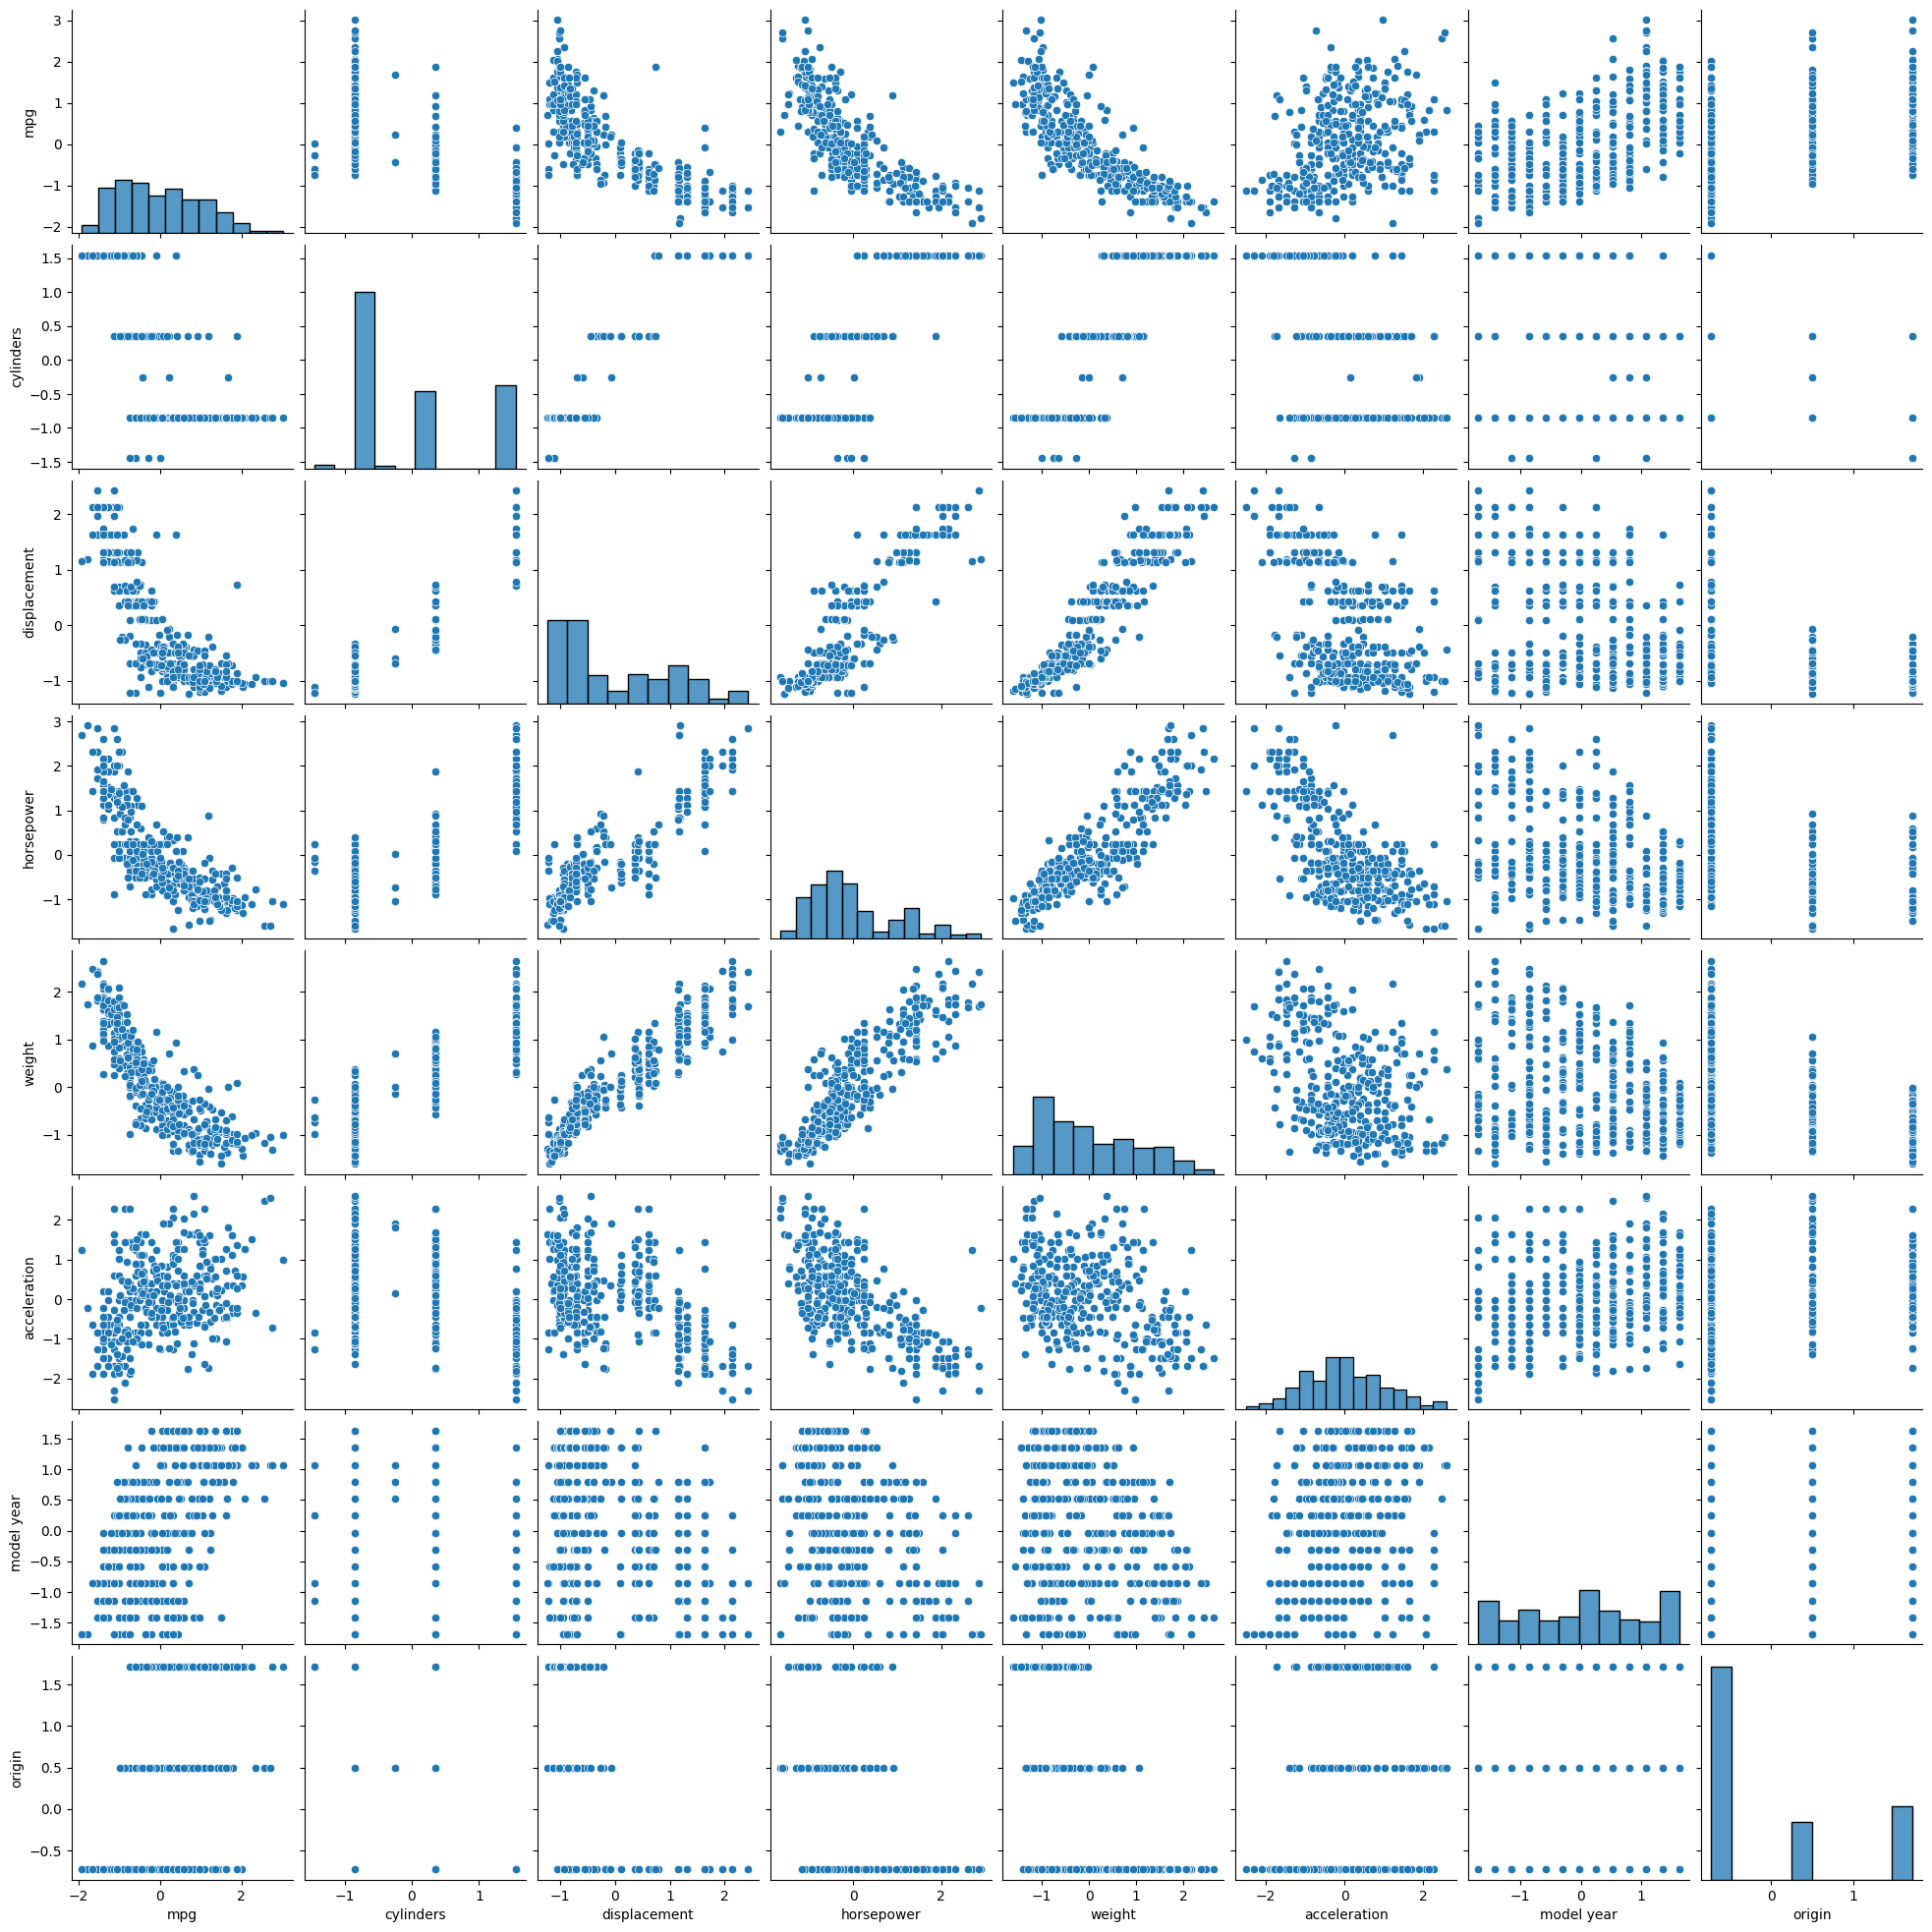

In [56]:
sns.pairplot(standardized_df)
plt.show()

In [57]:
mean_scaled = standardized_df.mean() 
print(mean_scaled)
variance_scaled=calculate_variance(standardized_df, mean_scaled)
scaled_std_vector = (variance_scaled)**0.5 
print(variance_scaled)

mpg            -3.840772e-16
cylinders      -1.728347e-16
displacement   -1.344270e-16
horsepower     -5.761157e-17
weight         -1.536309e-16
acceleration    9.601929e-17
model year      9.217852e-16
origin          1.152231e-16
dtype: float64
mpg             1.0
cylinders       1.0
displacement    1.0
horsepower      1.0
weight          1.0
acceleration    1.0
model year      1.0
origin          1.0
dtype: float64


### Total Variance After normalizing

In [58]:
total_variance = 0
for i in range(len(standardized_df)):
    total_variance += np.dot((standardized_df.iloc[i] - mean_scaled).T, (standardized_df.iloc[i] - mean_scaled))
total_variance = total_variance / len(standardized_df)
print("\nTotal Variance  (σ²):")
print(total_variance)


Total Variance  (σ²):
8.000000000000004


Convert 'model year' and 'cylinders' to categorical data types

In [59]:
df['model year'] = df['model year'].astype('category')
df['cylinders'] = df['cylinders'].astype('category')

print(df.dtypes)


mpg              float64
cylinders       category
displacement     float64
horsepower         int64
weight           float64
acceleration     float64
model year      category
origin           float64
dtype: object


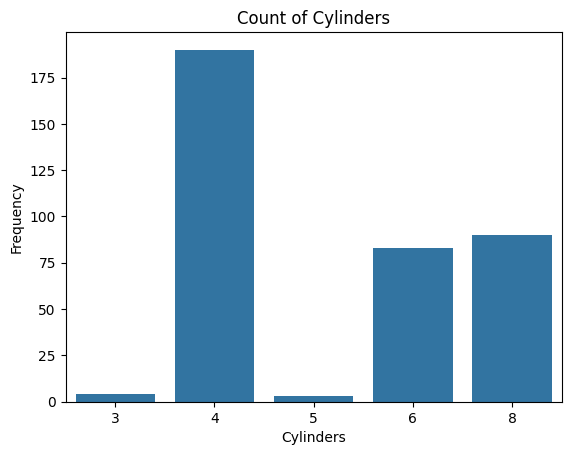

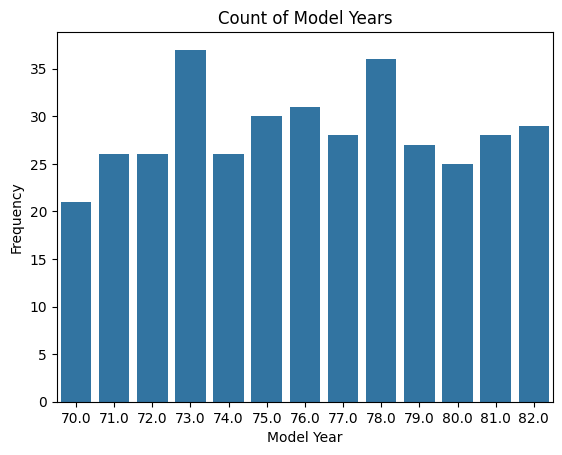

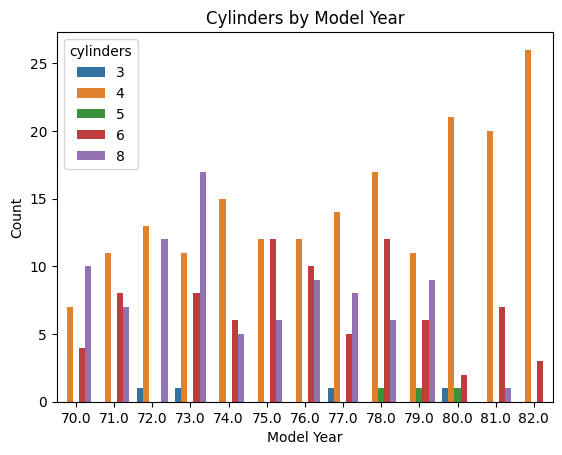

In [60]:
sns.countplot(data=df, x='cylinders')
plt.title("Count of Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Frequency")
plt.show()

sns.countplot(data=df, x='model year')
plt.title("Count of Model Years")
plt.xlabel("Model Year")
plt.ylabel("Frequency")
plt.show()

sns.countplot(data=df, x='model year', hue='cylinders')
plt.title("Cylinders by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.show()

This visualization  shows how the cylinders and model year values are categorical. Since both variables are categorical, the Chi-Square Test is appropriate for testing the independence of these variables.

### Chi-Square Test

Null Hypothesis (H₀): There is no significant association between the number of cylinders and the model year of the cars in the dataset. In other words, the variables model year and cylinders are independent.

Alternative Hypothesis (H₁): There is a significant association between the number of cylinders and the model year of the cars. In other words, the variables model year and cylinders are not independent.

Chi-Square:

$$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$

In [61]:
contingency_table = pd.crosstab(df['model year'], df['cylinders'])
print("Contingency Table:")
print(contingency_table)

total = contingency_table.to_numpy().sum()

expected_table = np.outer(contingency_table.sum(axis=1), contingency_table.sum(axis=0)) / total
expected_table = pd.DataFrame(expected_table, index=contingency_table.index, columns=contingency_table.columns)

print("\nExpected Frequencies:")
print(expected_table)

chi2_stat = ((contingency_table - expected_table) ** 2 / expected_table).to_numpy().sum()

dof = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)

print(f"\nChi-Square Statistic: {chi2_stat}")
print(f"Degrees of Freedom: {dof}")


Contingency Table:
cylinders   3   4  5   6   8
model year                  
70.0        0   7  0   4  10
71.0        0  11  0   8   7
72.0        1  13  0   0  12
73.0        1  11  0   8  17
74.0        0  15  0   6   5
75.0        0  12  0  12   6
76.0        0  12  0  10   9
77.0        1  14  0   5   8
78.0        0  17  1  12   6
79.0        0  11  1   6   9
80.0        1  21  1   2   0
81.0        0  20  0   7   1
82.0        0  26  0   3   0

Expected Frequencies:
cylinders          3          4         5         6         8
model year                                                   
70.0        0.227027  10.783784  0.170270  4.710811  5.108108
71.0        0.281081  13.351351  0.210811  5.832432  6.324324
72.0        0.281081  13.351351  0.210811  5.832432  6.324324
73.0        0.400000  19.000000  0.300000  8.300000  9.000000
74.0        0.281081  13.351351  0.210811  5.832432  6.324324
75.0        0.324324  15.405405  0.243243  6.729730  7.297297
76.0        0.335135  15.91

#### Conclusion

Since 98.93 > 65.171, you reject the null hypothesis and conclude that there is a significant association between model year and cylinders. (From the Chi-Square Test table)

### References
- https://www.scribbr.com/statistics/chi-square-test-of-independence/
- https://www.simplilearn.com/tutorials/statistics-tutorial/hypothesis-testing-in-statistics#:~:text=Choose%20a%20statistical%20test%20based,%2Dtailed%20or%20two%2Dtailed.
- https://www.medcalc.org/manual/statistical-tables.php